In [2]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

In [3]:
data = pd.read_csv("JAMAMA.csv")

home = 3
away = 4
hbp = 27
abp = 28
hf = 16
af = 17 



In [4]:
def readit(file):
    lst = []
    with open(file, "r") as myfile:
        csvreader = csv.reader(myfile)
        for row in csvreader:
            lst.append(row)
        lst.pop(0)
    return lst

# Read data
data = readit("JAMAMA.csv")

data[0]

def teams(lst):
    equipes = []
    for row in lst:
        if row[home] not in equipes:
            equipes.append(row[home])
    return equipes
x = teams(data)
x = sorted(x)
x

    

['Arsenal',
 'Aston Villa',
 'Brentford',
 'Brighton',
 'Burnley',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Leeds',
 'Leicester',
 'Liverpool',
 'Man City',
 'Man United',
 'Newcastle',
 'Norwich',
 'Sheffield United',
 'Southampton',
 'Tottenham',
 'Watford',
 'West Brom',
 'West Ham',
 'Wolves']

In [5]:
def bpavg(lst, team):
    total = 0
    count = 0
    for row in lst:
        if row[home] == team:
            total += int(row[hbp])
            count +=1
        elif row[away] == team:
            total += int(row[abp])
            count +=1
        else:
            continue
    avg = total / count
    return round(avg, 2)


In [6]:
def foulsavg(lst, team):
    total = 0
    count = 0
    for row in lst:
        if row[home] == team:
            total += int(row[hf])
            count +=1
        elif row[away] == team:
            total += int(row[af])
            count +=1
        else:
            continue
    avg = total / count
    return round(avg, 2)


In [7]:
def bpteams():
    equipes = {}
    for team in x:
        equipes[team] = bpavg(data, team)
    return equipes

def foulsby():
    fouls = {}
    for team in x:
        fouls[team] = foulsavg(data, team)
    return fouls
    
y = bpteams()
uhh = foulsby()
y

{'Arsenal': 17.04,
 'Aston Villa': 20.07,
 'Brentford': 18.03,
 'Brighton': 17.89,
 'Burnley': 15.92,
 'Chelsea': 15.92,
 'Crystal Palace': 16.91,
 'Everton': 20.26,
 'Fulham': 19.34,
 'Leeds': 22.5,
 'Leicester': 15.33,
 'Liverpool': 12.17,
 'Man City': 12.57,
 'Man United': 19.28,
 'Newcastle': 19.74,
 'Norwich': 15.79,
 'Sheffield United': 21.18,
 'Southampton': 16.78,
 'Tottenham': 16.78,
 'Watford': 16.97,
 'West Brom': 16.05,
 'West Ham': 14.47,
 'Wolves': 15.39}

In [8]:
def team_bp_averages(lst, teams):
    result = {}
    for team in teams:
        home_total, home_count = 0, 0
        away_total, away_count = 0, 0
        for row in lst:
            if row[home] == team:
                home_total += int(row[hbp])
                home_count += 1
            elif row[away] == team:
                away_total += int(row[abp])
                away_count += 1
        home_avg = round(home_total / home_count, 2)
        away_avg = round(away_total / away_count, 2)

        result[team] = (home_avg, away_avg)
    
    return result

bp_by_homeoraway = team_bp_averages(data, x)


In [9]:
def home_away_bp_difference(dict):
    differences = {}
    for team, (home, away) in bp_by_homeoraway.items():
        differences[team] = round(home - away,2)
    return differences

HvsA_bp = home_away_bp_difference(bp_by_homeoraway)
list_of_diff = HvsA_bp.values()
list_of_diff

dict_values([-3.82, -1.97, -0.27, -0.79, -1.32, -1.32, -1.71, 2.11, 4.47, 2.9, -6.44, -1.18, -3.81, -0.66, -0.79, -1.06, -6.05, -2.5, -1.71, 3.42, 0.53, -0.79, 3.15])

In [10]:
average_bp = list(y.values())
average_fls = list(uhh.values())

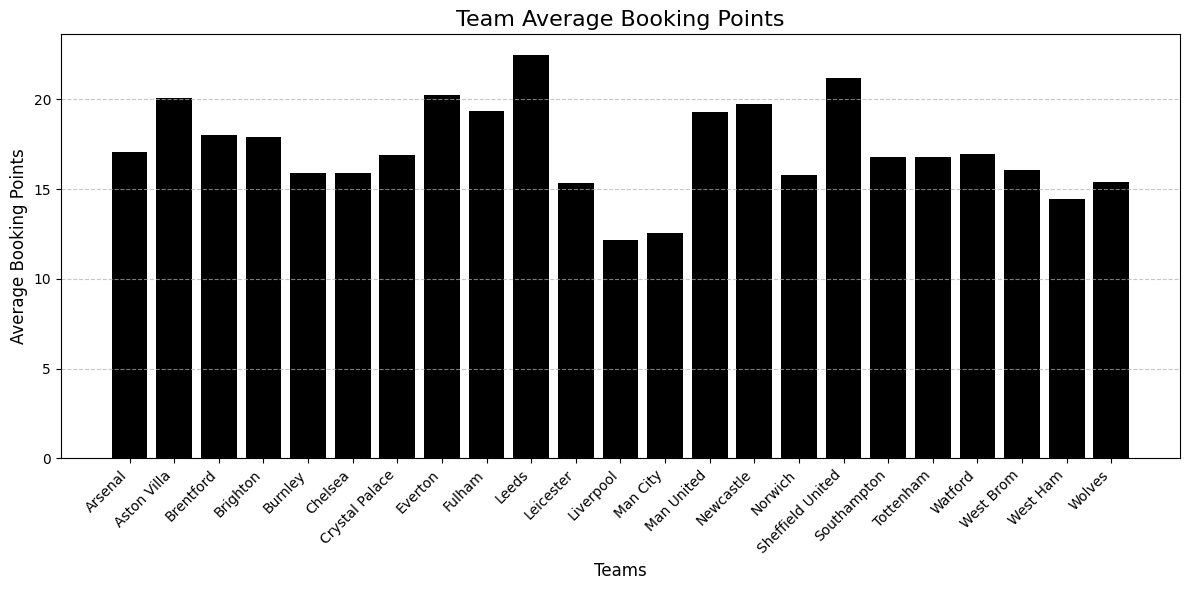

In [13]:
#colors = ['#DB0007', '#95bfe5', '#D20000', '#0057B8', '#6C1D45', '#034694', '#1B458F', '#003399', 
#          '#000000', '#FFCD00', '#003090', '#c8102E', '#c8102E', '#DA291C', '#241F20', '#FFF200',
#          '#EE2737', '#EE2737', '#132257', '#132257', '#122F67', '#7A263A', '#FDB913']

#colors = plt.cm.coolwarm(np.linspace(0, 1, len(x)))
plt.figure(figsize=(12, 6))
plt.bar(x, average_bp, color='black')  # Assign custom colors
plt.title("Team Average Booking Points", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Average Booking Points", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

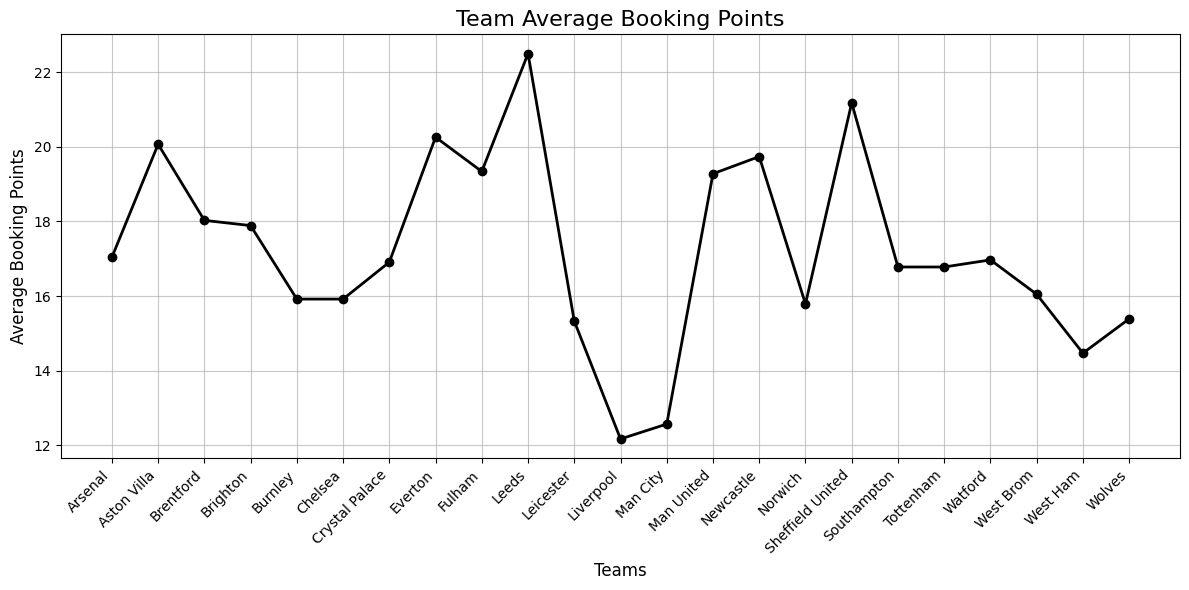

In [15]:
# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(x, average_bp, marker="o", linestyle="-", color="black", linewidth=2)
plt.title("Team Average Booking Points", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Average Booking Points", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show() 



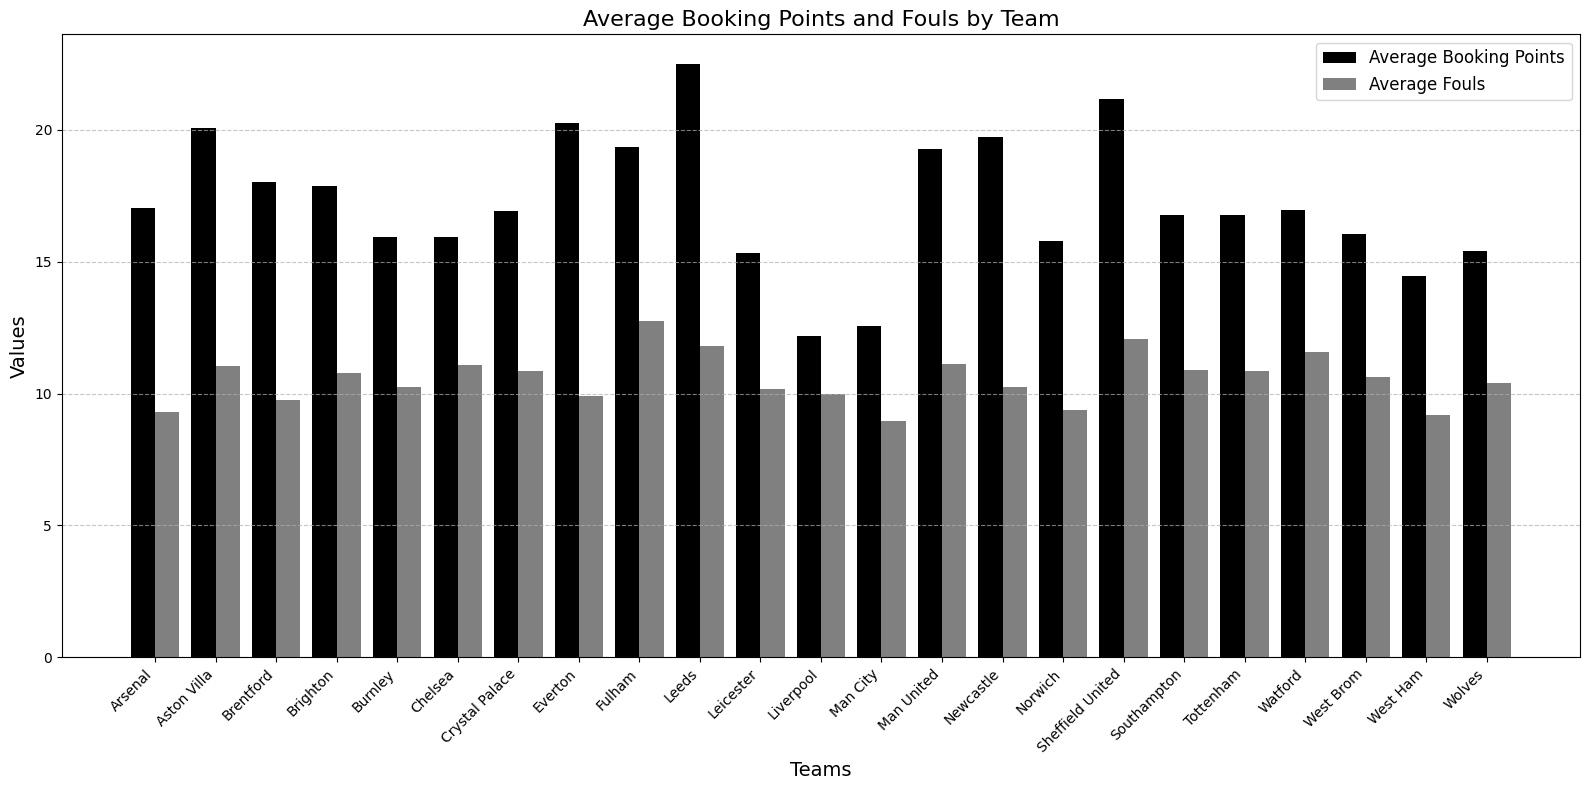

In [22]:
x_pos = np.arange(len(x))  # Positions for the groups
bar_width = 0.4  # Width of each bar

# Create the figure
plt.figure(figsize=(16, 8))  # Wide figure for 23 teams

# Booking points bars
plt.bar(x_pos - bar_width/2, average_bp, width=bar_width, color='black', label='Average Booking Points')

# Fouls bars
plt.bar(x_pos + bar_width/2, average_fls, width=bar_width, color='gray', label='Average Fouls')

# Add labels, title, and legend
plt.xlabel("Teams", fontsize=14)
plt.ylabel("Values", fontsize=14)
plt.title("Average Booking Points and Fouls by Team", fontsize=16)
plt.xticks(x_pos, x, fontsize=10, rotation=45, ha='right')  # Rotate team names for better readability
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for tight spacing
plt.tight_layout()

# Show the plot
plt.show()

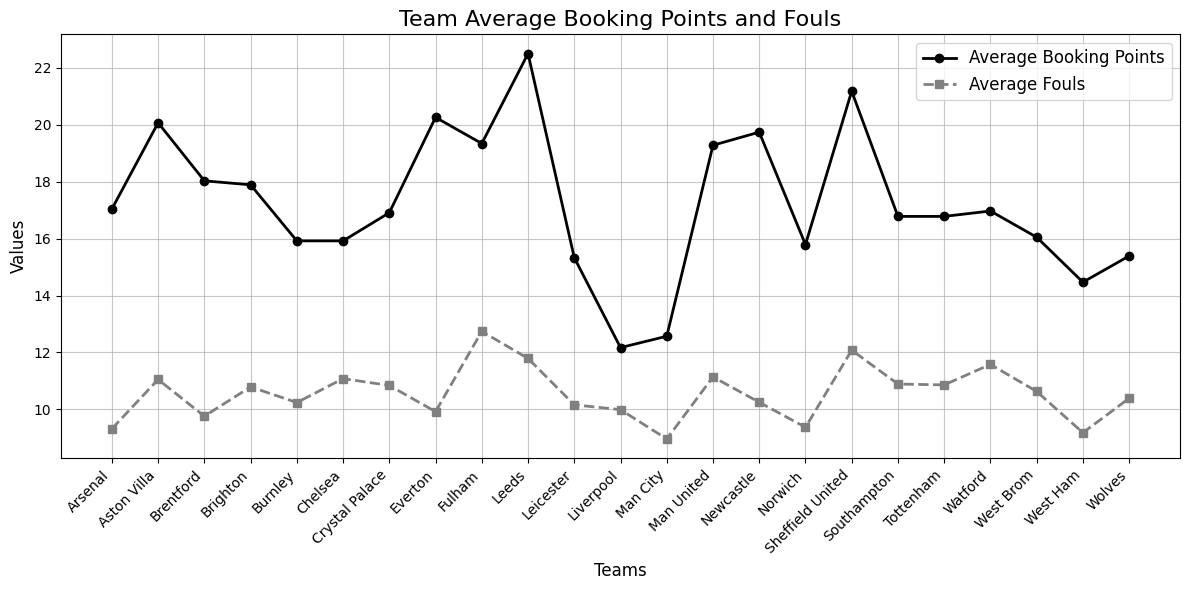

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(x, average_bp, marker="o", linestyle="-", color="black", linewidth=2, label="Average Booking Points")
plt.plot(x, average_fls, marker="s", linestyle="--", color="gray", linewidth=2, label="Average Fouls")


plt.title("Team Average Booking Points and Fouls", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Values", fontsize=12)


plt.xticks(rotation=45, ha='right')


plt.grid(alpha=0.7)


plt.legend(fontsize=12)


plt.tight_layout()


plt.show()


In [26]:
bp_per_foul = result = [round(a / b, 2) for a, b in zip(average_bp, average_fls)]

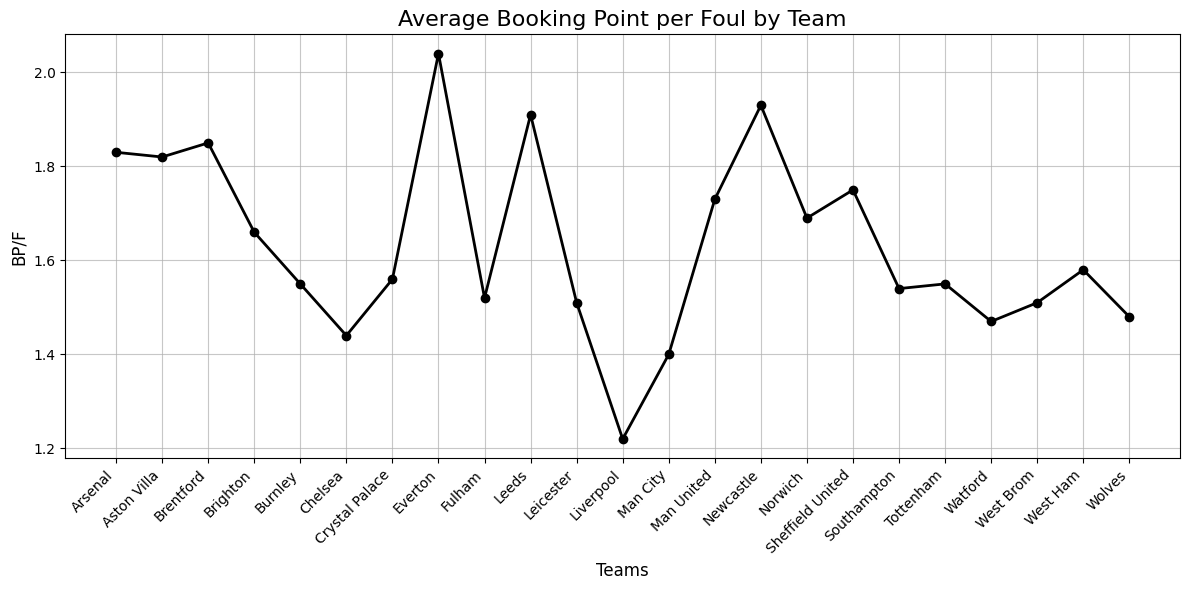

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(x, bp_per_foul, marker="o", linestyle="-", color="black", linewidth=2)
plt.title("Average Booking Point per Foul by Team", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("BP/F", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show() 

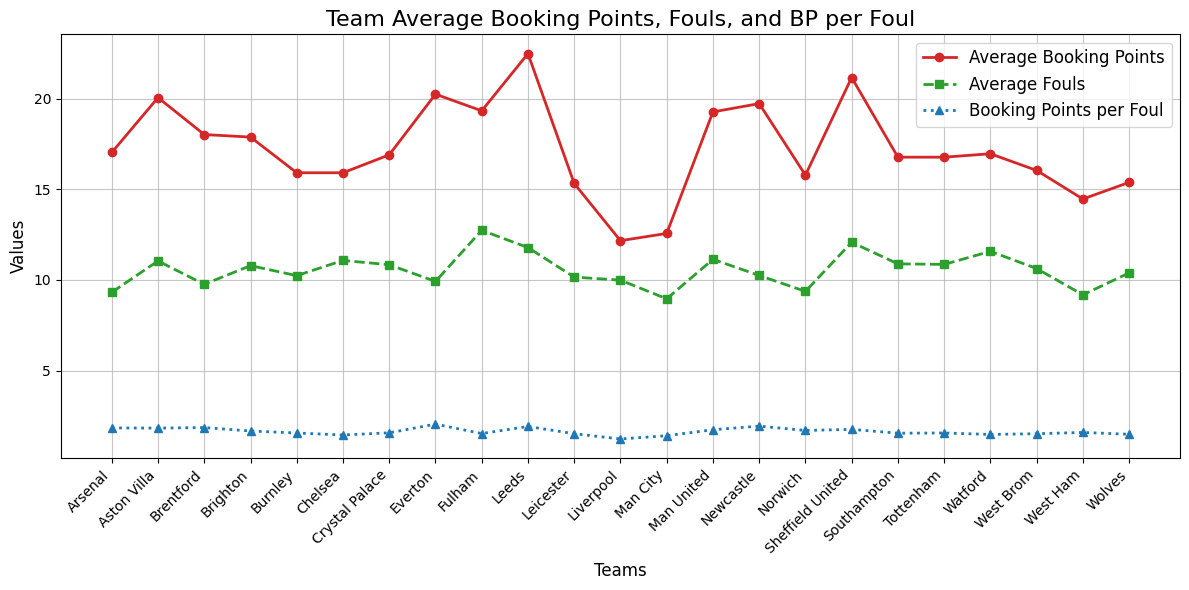

In [28]:
plt.figure(figsize=(12, 6))

plt.plot(x, average_bp, marker="o", linestyle="-", color="#D62728", linewidth=2, label="Average Booking Points")

plt.plot(x, average_fls, marker="s", linestyle="--", color="#2CA02C", linewidth=2, label="Average Fouls")

plt.plot(x, bp_per_foul, marker="^", linestyle=":", color="#1F77B4", linewidth=2, label="Booking Points per Foul")

plt.title("Team Average Booking Points, Fouls, and BP per Foul", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Values", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(alpha=0.7)

plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

In [29]:
def normalize(values):
    normd = []
    maxi = max(values)
    mini = min(values)
    denomi = maxi - mini
    for val in values:
        newnew = (val - mini) / denomi
        normd.append(newnew)
    return normd


In [30]:
norm_bp = normalize(average_bp)
norm_fls = normalize(average_fls)
norm_bpf = normalize(bp_per_foul)

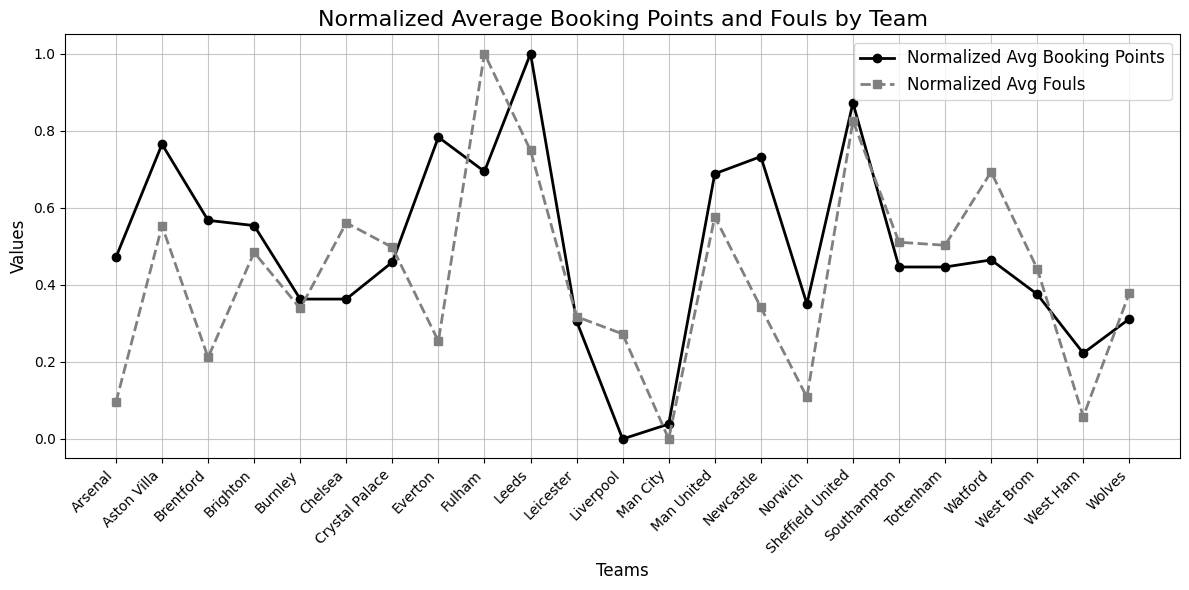

In [37]:
plt.figure(figsize=(12, 6))

plt.plot(x, norm_bp, marker="o", linestyle="-", color="black", linewidth=2, label="Normalized Avg Booking Points")

plt.plot(x, norm_fls, marker="s", linestyle="--", color="gray", linewidth=2, label="Normalized Avg Fouls")

plt.title("Normalized Average Booking Points and Fouls by Team", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Values", fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(alpha=0.7)

plt.legend(fontsize=12)

plt.tight_layout()

plt.show()

In [32]:
bars = [a - b for a, b in zip(norm_bp, norm_fls)]

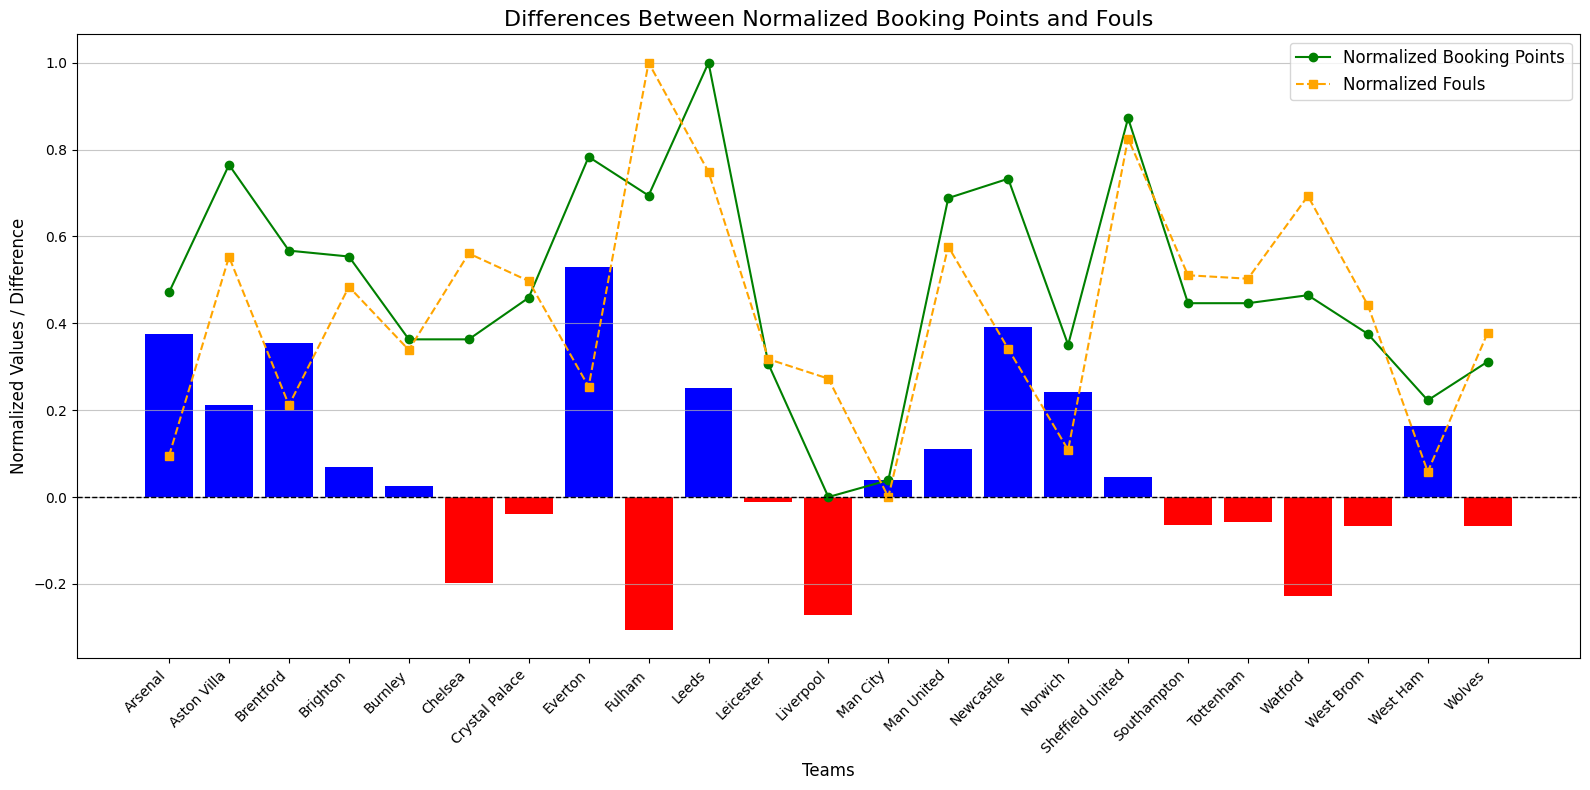

In [33]:
colores = ["blue" if diff > 0 else "red" for diff in bars]

plt.figure(figsize=(16, 8))  # Wider figure for 23 teams
plt.bar(x, bars, color=colores)

plt.plot(x, norm_bp, marker="o", linestyle="-", color="green", label="Normalized Booking Points")
plt.plot(x, norm_fls, marker="s", linestyle="--", color="orange", label="Normalized Fouls")

plt.xlabel("Teams", fontsize=12)
plt.ylabel("Normalized Values / Difference", fontsize=12)
plt.title("Differences Between Normalized Booking Points and Fouls", fontsize=16)
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Horizontal line at y=0 for reference
plt.legend(fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=10)

plt.grid(axis="y", alpha=0.7)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


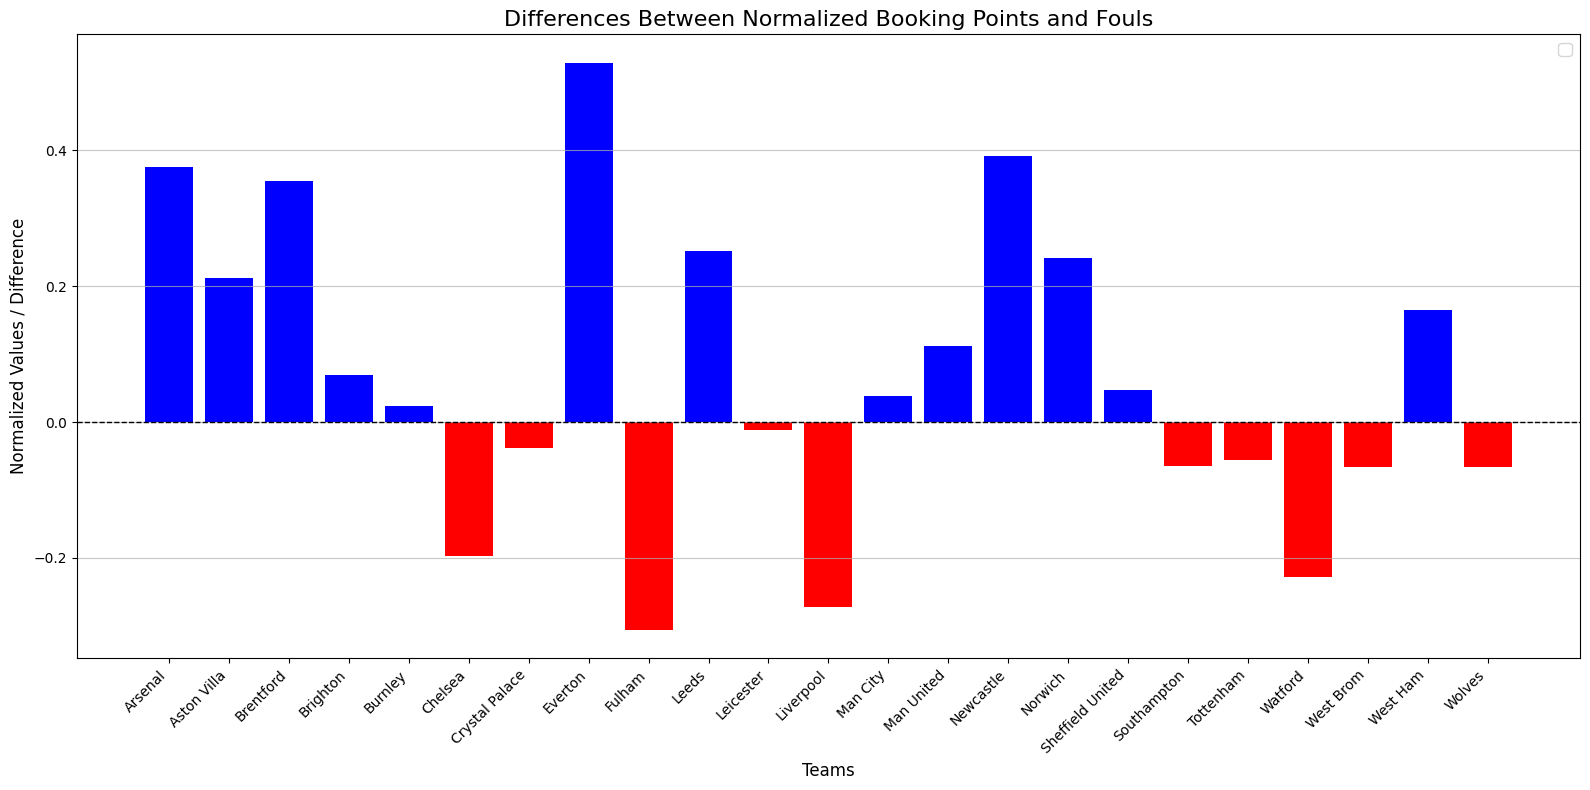

In [40]:
plt.figure(figsize=(16, 8))  # Wider figure for 23 teams
plt.bar(x, bars, color=colores)

plt.xlabel("Teams", fontsize=12)
plt.ylabel("Normalized Values / Difference", fontsize=12)
plt.title("Differences Between Normalized Booking Points and Fouls", fontsize=16)
plt.axhline(0, color="black", linewidth=1, linestyle="--")  # Horizontal line at y=0 for reference
plt.legend(fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=10)

plt.grid(axis="y", alpha=0.7)

plt.tight_layout()
plt.show()

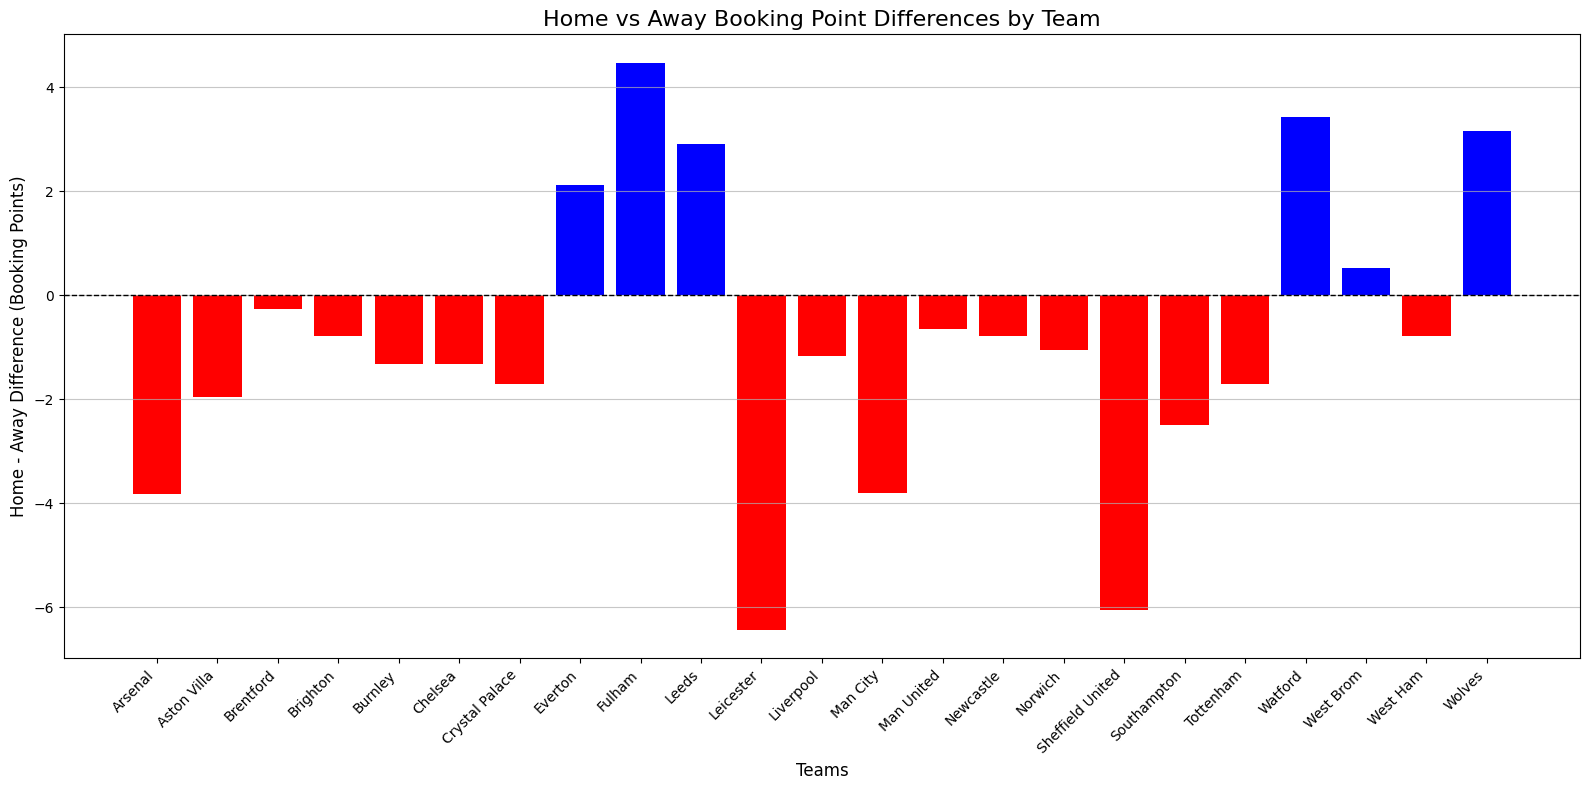

In [35]:
colours = ["blue" if diff > 0 else "red" for diff in list_of_diff]

plt.figure(figsize=(16, 8)) 

plt.bar(x, list_of_diff, color=colours)

plt.xlabel("Teams", fontsize=12)
plt.ylabel("Home - Away Difference (Booking Points)", fontsize=12)
plt.title("Home vs Away Booking Point Differences by Team", fontsize=16)

plt.axhline(0, color="black", linewidth=1, linestyle="--")

plt.xticks(rotation=45, ha="right", fontsize=10)

plt.grid(axis="y", alpha=0.7)

plt.tight_layout()

plt.show()
